In [2]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("D:/DL_ML_AiQuest_PacticeWork/class_practice_project/Datasets/game data.csv")

In [5]:
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [6]:
df = df.drop("Days", axis=1)
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [8]:
df.isnull().sum()

Outlook         0
Temprature      0
Routine         0
Wear Jacket?    0
dtype: int64

In [9]:
df.isnull().any()

Outlook         False
Temprature      False
Routine         False
Wear Jacket?    False
dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       8 non-null      object
 1   Temprature    8 non-null      object
 2   Routine       8 non-null      object
 3   Wear Jacket?  8 non-null      object
dtypes: object(4)
memory usage: 388.0+ bytes


In [11]:
df.value_counts()

Outlook  Temprature  Routine  Wear Jacket?
Cloudy   Cold        Indoor   Yes             1
                     Outdoor  Yes             1
         Warm        Indoor   No              1
                     Outdoor  No              1
Sunny    Cold        Indoor   No              1
                     Outdoor  Yes             1
         Warm        Indoor   No              1
                     Outdoor  No              1
Name: count, dtype: int64

In [13]:
df['Outlook'].value_counts()

Outlook
Sunny     4
Cloudy    4
Name: count, dtype: int64

In [15]:
df["Temprature"].value_counts()

Temprature
Cold    4
Warm    4
Name: count, dtype: int64

In [16]:
df["Routine"].value_counts()

Routine
Indoor     4
Outdoor    4
Name: count, dtype: int64

In [17]:
x = df.drop("Wear Jacket?", axis=1)
y = df["Wear Jacket?"]

In [18]:
x

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor
5,Sunny,Warm,Outdoor
6,Cloudy,Warm,Indoor
7,Sunny,Warm,Indoor


In [19]:
y

0     No
1    Yes
2     No
3    Yes
4    Yes
5     No
6     No
7     No
Name: Wear Jacket?, dtype: object

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

In [23]:
x[['Outlook', 'Temprature', 'Routine']] = x[['Outlook', 'Temprature', 'Routine']].apply(lambda col: le.fit_transform(col))

In [24]:
x

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1
6,0,1,0
7,1,1,0


In [29]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
clf = DecisionTreeClassifier()

In [28]:
clf.fit(x, y)

DecisionTreeClassifier()

In [33]:
clf.predict([[1, 0, 0]])  #Sunny, Cold, Indoor

array(['No'], dtype=object)

In [34]:
clf.predict([[0, 0, 1]])

array(['Yes'], dtype=object)

[Text(0.6, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'x[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

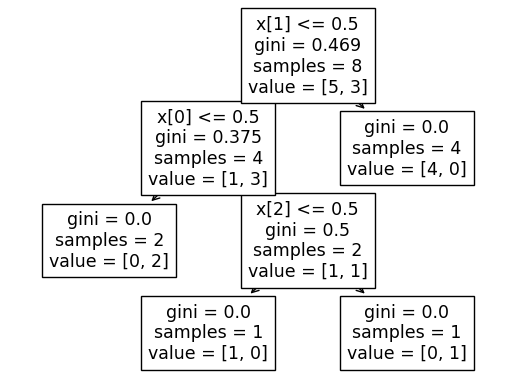

In [35]:
tree.plot_tree(clf)

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4, 0.625, 'Outlook <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.375, 'Routine <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

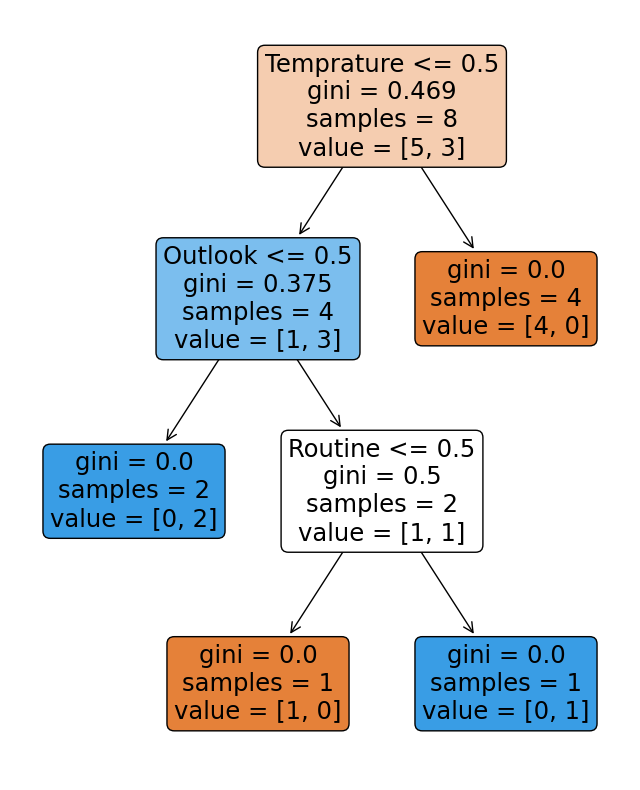

In [41]:
plt.figure(figsize=(8, 10))
tree.plot_tree(clf, feature_names=x.columns, filled=True, rounded=True)